# **Project Name**    - 🛒 Shopper Spectrum : Customer Segmentation and Product Recommendations in E-Commerce

##### **Project Type**    - EDA / Unsupervised + Recommendation System
##### **Contribution**    - Individual
##### **Name = Atharva More**


# **Project Summary -**
The Shopper Spectrum project is a comprehensive individual project that combines exploratory data analysis (EDA), unsupervised learning, and recommendation systems within the domain of E-Commerce and Retail Analytics. The main objective is to uncover patterns in customer purchasing behavior, identify distinct customer segments, and build a product recommendation engine to enhance personalization for end-users.

Using real-world online retail transaction data, the project first involves data cleaning and preprocessing, such as removing invalid entries, handling missing customer IDs, and filtering cancelled transactions. Following this, an in-depth EDA is performed to analyze sales trends, top-selling products, country-wise revenue distribution, and customer spending patterns using advanced visualizations including pie charts, treemaps, heatmaps, and time series plots.

The core of the project is RFM (Recency, Frequency, Monetary) analysis, where customer behavior is quantified and standardized to perform KMeans clustering. The optimal number of clusters is determined using the Elbow Method and Silhouette Analysis, and each cluster is interpreted to label customer segments such as High-Value, Regular, Occasional, and At-Risk. Visualizations such as 2D scatter plots and pairplots are used to display the segmentation clearly.

Additionally, the project implements an Item-Based Collaborative Filtering Recommendation System using cosine similarity on a Customer-Product interaction matrix. This allows dynamic suggestions of similar products when a user searches for any item in the catalog, enhancing cross-selling and user engagement potential.

The final output is structured in a well-documented Python notebook, with clean modular code and visuals. It not only fulfills academic objectives but also replicates practical use cases in real-time e-commerce platforms, such as personalized marketing, retention strategies, and inventory optimization.










# **GitHub Link -**   https://github.com/Atharvmore6666/Customer-Segmentation-and-Recommender-System-Using-RFM-and-KMeans

# **Problem Statement**


In the fast-growing world of e-commerce, businesses often struggle with two key challenges:

Providing Personalized Product Recommendations:
With thousands of products listed, helping customers discover relevant or similar items based on their interests is essential to improve user engagement, boost sales, and reduce bounce rates. However, many systems rely solely on manual tagging or basic filtering, which lacks personalization and scalability.

Understanding Customer Behavior for Strategic Targeting:
E-commerce platforms gather large amounts of customer transaction data but often fail to extract actionable insights. Without clear segmentation based on customer value and behavior, marketing efforts can become generic, inefficient, and costly.

This project aims to address these challenges by building a Streamlit-based web app that combines:

A Collaborative Filtering-based Product Recommendation System, and

An RFM-based Customer Segmentation Model using KMeans Clustering.

Together, these modules empower businesses with tools to deliver smarter recommendations and targeted customer strategies.

### Import Libraries

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # for treemaps
from matplotlib.ticker import FuncFormatter

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline


In [ ]:
# 🔧 Setup
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (14, 6)

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/E-commerce/online_retail.csv"

In [ ]:
df = pd.read_csv(file_path)


### Dataset First View

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
df.shape

(541909, 8)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


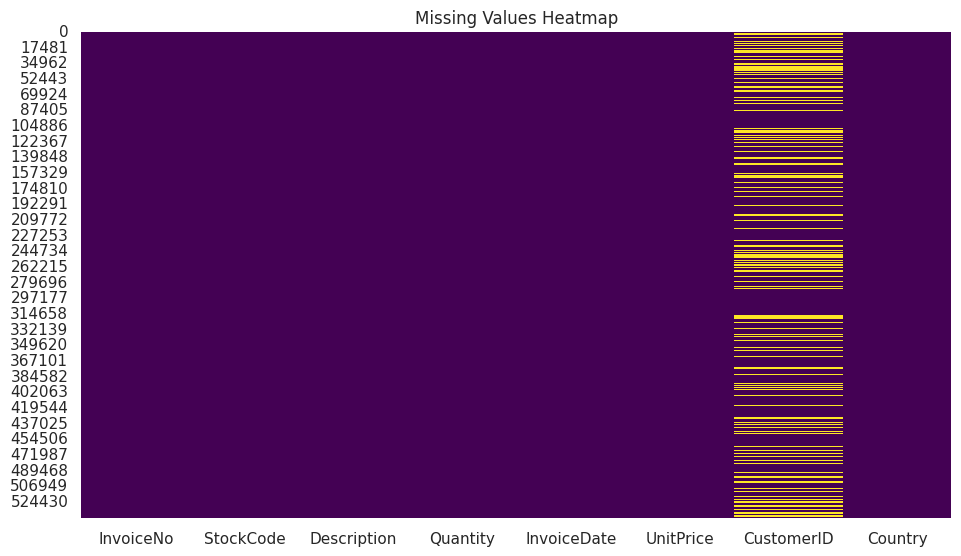

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get some infos on columns types and numer of null values

# Using the different columns transpose the datatypes of each column as its respective row/value
# To enable us get more intuition about the data type
col_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

# Sum the null values of each variable, transpose them(row name (null values (nb))) and append them to the col_info dataframe
col_info = pd.concat([col_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])

# Divide the sum null values by the total number of rows of our dataset, transpose and append to the col_info dataframe
# This will give us the percentage value of missing data from that column/variable
col_info = pd.concat([col_info, pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename
                           (index={0:'null values (%)'})])

In [ ]:
col_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


As seen from the above dataframe, is obvious that the CustomerID contributed to 25% of missing data

While looking at the number of null values in the dataframe, it is interesting to note that 25% of the entries are not assigned to a/some particular customer(s). With the data available, it is impossible to impute values for the user and these entries are thus useless for this Project. So I'll delete them from the dataframe:

In [ ]:
# I will have to drop the missing values/rows from the CustomerID
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (406829, 8)


In [ ]:
# Giving some infos on columns types and number of null values
col_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
col_info = pd.concat([col_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])

col_info = pd.concat([col_info, pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                           rename(index={0:'null values (%)'})])
display(col_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Having removed all missing values, looks like we have a dataframe filled at 100% for all variables! Now, I'd check for duplicate entries and delete them as well


[ ]


In [ ]:
df['Country'].duplicated().value_counts()

,count
Country,
True,406792
False,37


In [ ]:
df['InvoiceNo'].duplicated().value_counts()

,count
InvoiceNo,
True,384639
False,22190


In [ ]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicate Entries: 5225


In [ ]:
print("Shape of the data set after droping duplicate entries :", format(df.shape))

Shape of the data set after droping duplicate entries : (401604, 8)


### Countries

A quick look at the `respective countries` from which `orders` were made

In [ ]:
# group the CustomerId, InvoiceNo and Country column in the following order and take count
temp_cou = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

In [ ]:
# this displays the individual customers IDs', different InvoiceNo based on dates of purchase and the customer's country
temp_cou

Empty DataFrame
Columns: []
Index: [(12346.0, 541431, United Kingdom), (12346.0, C541433, United Kingdom), (12347.0, 537626, Iceland), (12347.0, 542237, Iceland), (12347.0, 549222, Iceland), (12347.0, 556201, Iceland), (12347.0, 562032, Iceland), (12347.0, 573511, Iceland), (12347.0, 581180, Iceland), (12348.0, 539318, Finland), (12348.0, 541998, Finland), (12348.0, 548955, Finland), (12348.0, 568172, Finland), (12349.0, 577609, Italy), (12350.0, 543037, Norway), (12352.0, 544156, Norway), (12352.0, 545323, Norway), (12352.0, 545332, Norway), (12352.0, 546869, Norway), (12352.0, 547390, Norway), (12352.0, 567505, Norway), (12352.0, 568699, Norway), (12352.0, 574275, Norway), (12352.0, C545329, Norway), (12352.0, C545330, Norway), (12352.0, C547388, Norway), (12353.0, 553900, Bahrain), (12354.0, 550911, Spain), (12355.0, 552449, Bahrain), (12356.0, 541430, Portugal), (12356.0, 549435, Portugal), (12356.0, 576895, Portugal), (12357.0, 574740, Switzerland), (12358.0, 559707, Austria), (12358.0, 581232, Austria), (12359.0, 540946, Cyprus), (12359.0, 543370, Cyprus), (12359.0, 555477, Cyprus), (12359.0, 571034, Cyprus), (12359.0, C549955, Cyprus), (12359.0, C580165, Cyprus), (12360.0, 554132, Austria), (12360.0, 563749, Austria), (12360.0, 571705, Austria), (12361.0, 545017, Belgium), (12362.0, 544203, Belgium), (12362.0, 551346, Belgium), (12362.0, 559295, Belgium), (12362.0, 563037, Belgium), (12362.0, 568651, Belgium), (12362.0, 570667, Belgium), (12362.0, 572887, Belgium), (12362.0, 573173, Belgium), (12362.0, 574329, Belgium), (12362.0, 580979, Belgium), (12362.0, C544902, Belgium), (12362.0, C563752, Belgium), (12362.0, C579178, Belgium), (12363.0, 549687, Unspecified), (12363.0, 563947, Unspecified), (12364.0, 563854, Belgium), (12364.0, 567897, Belgium), (12364.0, 573401, Belgium), (12364.0, 580152, Belgium), (12365.0, 544574, Cyprus), (12365.0, 544578, Cyprus), (12365.0, C544577, Cyprus), (12367.0, 580716, Denmark), (12370.0, 538826, Cyprus), (12370.0, 539330, Austria), (12370.0, 546236, Cyprus), (12370.0, 571905, Cyprus), (12371.0, 570521, Switzerland), (12371.0, 572770, Switzerland), (12372.0, 544157, Denmark), (12372.0, 552731, Denmark), (12372.0, 568872, Denmark), (12373.0, 542887, Austria), (12374.0, 576345, Austria), (12375.0, 565333, Finland), (12375.0, 579281, Finland), (12375.0, C581071, Finland), (12377.0, 539488, Switzerland), (12377.0, 542586, Switzerland), (12378.0, 562046, Switzerland), (12379.0, 557789, Belgium), (12379.0, 567196, Belgium), (12379.0, C559193, Belgium), (12380.0, 555739, Belgium), (12380.0, 567928, Belgium), (12380.0, 571187, Belgium), (12380.0, 577180, Belgium), (12380.0, C572532, Belgium), (12381.0, 563100, Norway), (12381.0, 570681, Norway), (12381.0, 570725, Norway), (12381.0, 574694, Norway), (12381.0, 580638, Norway), (12381.0, C565050, Norway), (12383.0, 539840, Belgium), ...]

[22190 rows x 0 columns]

In [ ]:
# Add an index number
# reset_index() is a method to reset index of a Data Frame.
# reset_index() method sets a list of integer ranging from 0 to length of data as index.
temp_cou = temp_cou.reset_index(drop = False)

In [ ]:
temp_cou

,CustomerID,InvoiceNo,Country
0,12346.0,541431,United Kingdom
1,12346.0,C541433,United Kingdom
2,12347.0,537626,Iceland
3,12347.0,542237,Iceland
4,12347.0,549222,Iceland
...,...,...,...
22185,18283.0,579673,United Kingdom
22186,18283.0,580872,United Kingdom
22187,18287.0,554065,United Kingdom
22188,18287.0,570715,United Kingdom


In [ ]:
# Take count of the number of unique countries
countries = temp_cou['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


In [ ]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Netherlands', 'Switzerland', 'Portugal', 'Australia', 'Italy',
       'Finland', 'Sweden', 'Norway', 'Channel Islands', 'Japan', 'Poland',
       'Denmark', 'Cyprus', 'Austria', 'Singapore', 'Malta', 'Unspecified',
       'Iceland', 'USA', 'Canada', 'Israel', 'Greece', 'European Community',
       'Czech Republic', 'Lithuania', 'United Arab Emirates', 'Bahrain',
       'Saudi Arabia', 'RSA', 'Lebanon', 'Brazil'],
      dtype='object', name='Country')

In [ ]:
countries

,count
Country,
United Kingdom,19857
Germany,603
France,458
EIRE,319
Belgium,119
Spain,105
Netherlands,101
Switzerland,71
Portugal,70


In [ ]:
# Remove cancelled orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [ ]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.shape

(392692, 9)

In [ ]:
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   TotalPrice    392692 non-null  float64       
 9   InvoiceDay    392692 non-null  object        
 10  InvoiceMonth  392692 non-null  object        
 11  Hour          392692 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 37.5+ MB


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
# Optional: set default renderer to colab
pio.renderers.default = 'colab'

In [ ]:
# ✅ Step 3: Define data and layout correctly
data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries.values,
    text=countries.index,
    colorbar={'title': 'Order Count'},
    colorscale=[[0, 'rgb(224,255,255)'],
                [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
                [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
                [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
                [1, 'rgb(227,26,28)']],
    reversescale=False
)

layout = dict(
    title='🌍 Number of Orders per Country',
    geo=dict(showframe=True, projection={'type': 'mercator'})
)

In [ ]:
# ✅ Step 4: Create and display the map
fig = go.Figure(data=[data], layout=layout)
fig.show()

#  Daily Revenue Trend

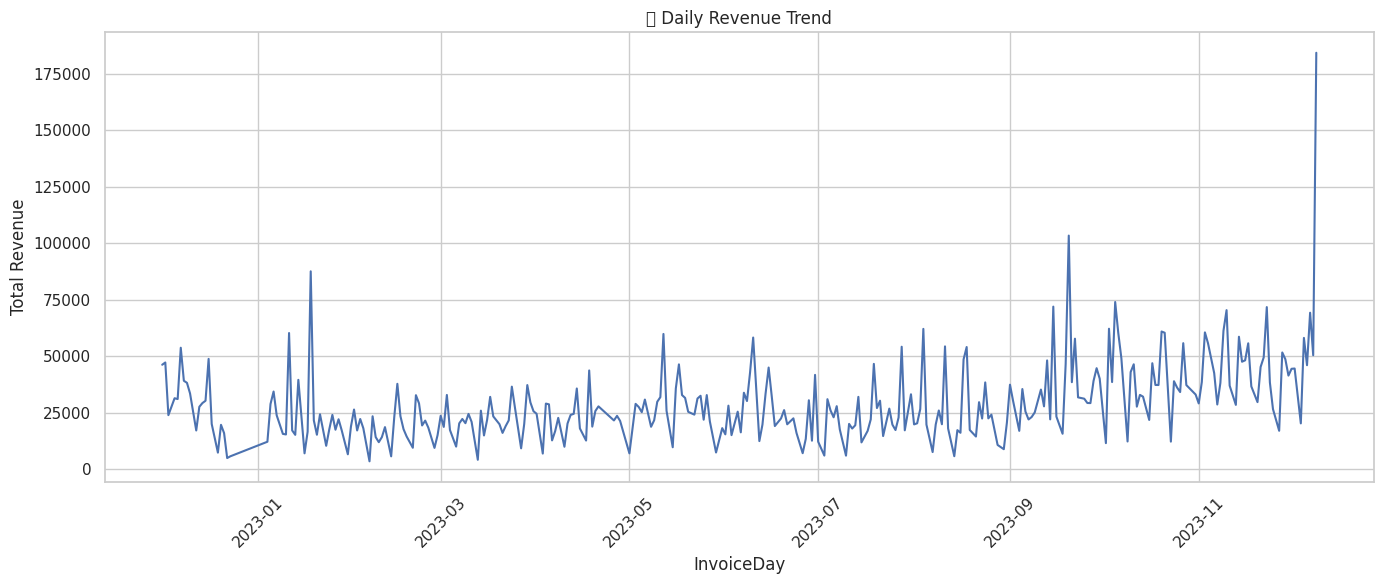

In [ ]:

daily = df.groupby('InvoiceDay')['TotalPrice'].sum().reset_index()
sns.lineplot(data=daily, x='InvoiceDay', y='TotalPrice')
plt.title("📈 Daily Revenue Trend")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Products by Quantity




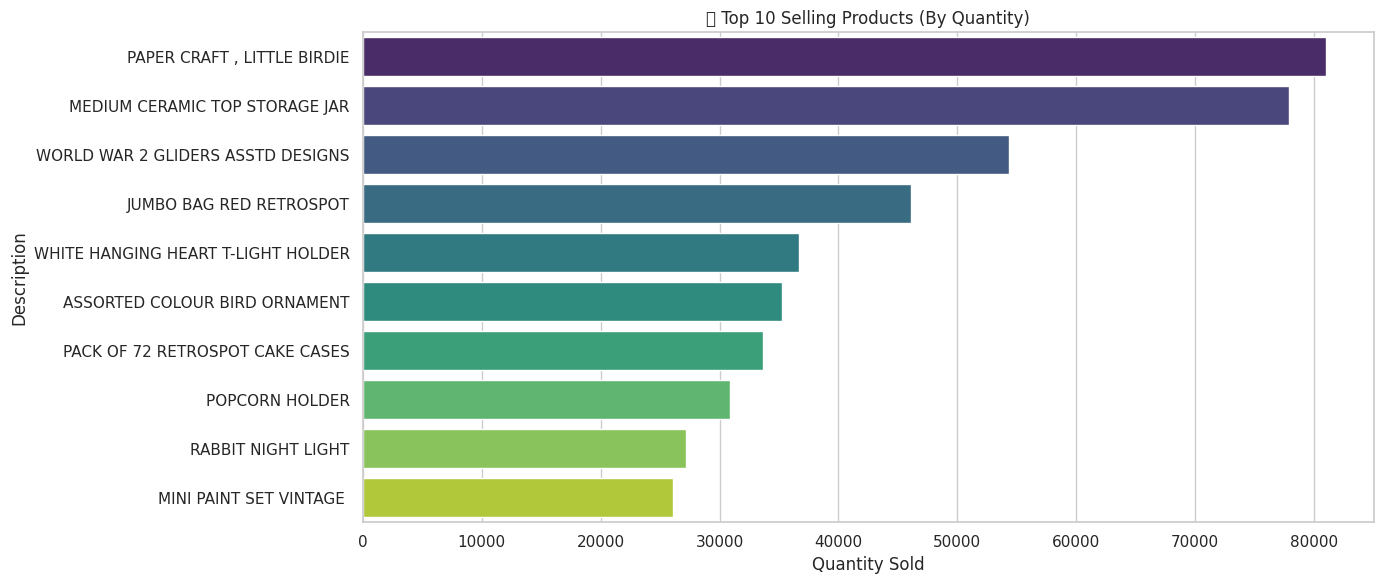

In [ ]:

top_products = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
sns.barplot(data=top_products, x='Quantity', y='Description', palette="viridis")
plt.title("🏆 Top 10 Selling Products (By Quantity)")
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()


# Revenue by Country – DONUT Chart

In [ ]:
# Prepare data
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(8)

# Donut Chart with Tooltip
fig = go.Figure(data=[go.Pie(
    labels=top_countries.index,
    values=top_countries.values,
    hole=0.7,
    hoverinfo='label+percent+value',
    textinfo='percent',
    textfont_size=14,
    marker=dict(line=dict(color='#000000', width=1))
)])

fig.update_layout(
    title_text="🌍 Revenue Share by Top 8 Countries (Interactive Donut)",
    annotations=[dict(text='Revenue', x=0.5, y=0.5, font_size=20, showarrow=False)],
    height=600,
    width=700
)

fig.show()

#  Monthly Revenue Trend

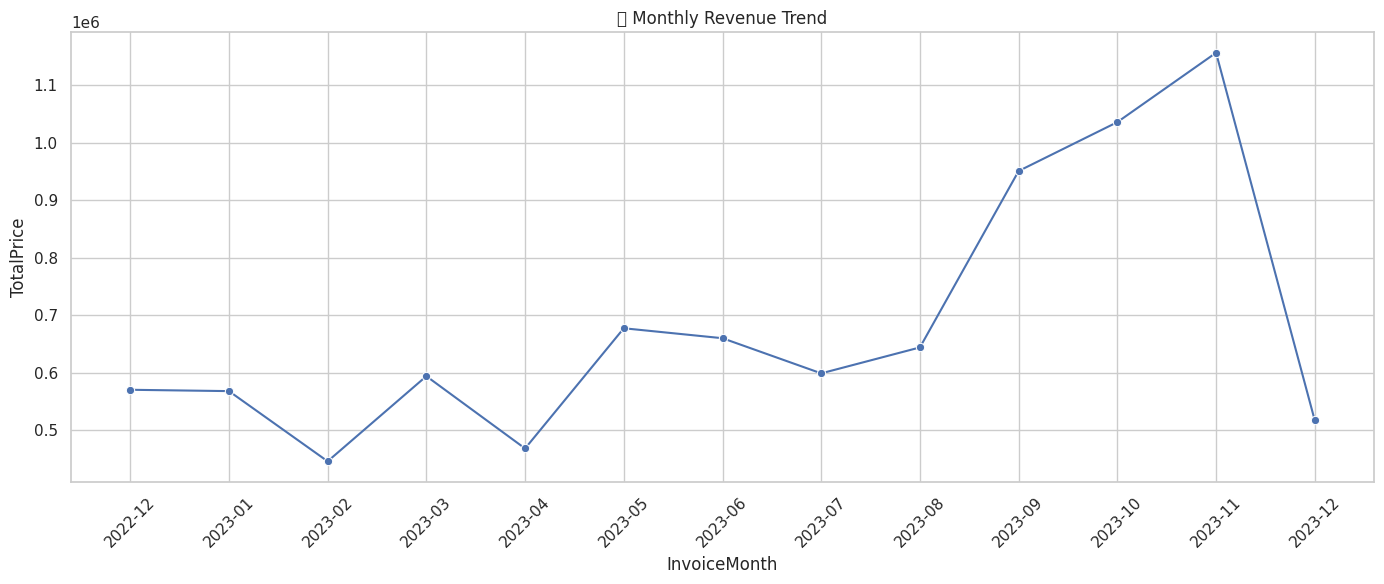

In [ ]:
monthly = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
sns.lineplot(data=monthly, x='InvoiceMonth', y='TotalPrice', marker='o')
plt.title("🗓️ Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hourly Purchase Distribution

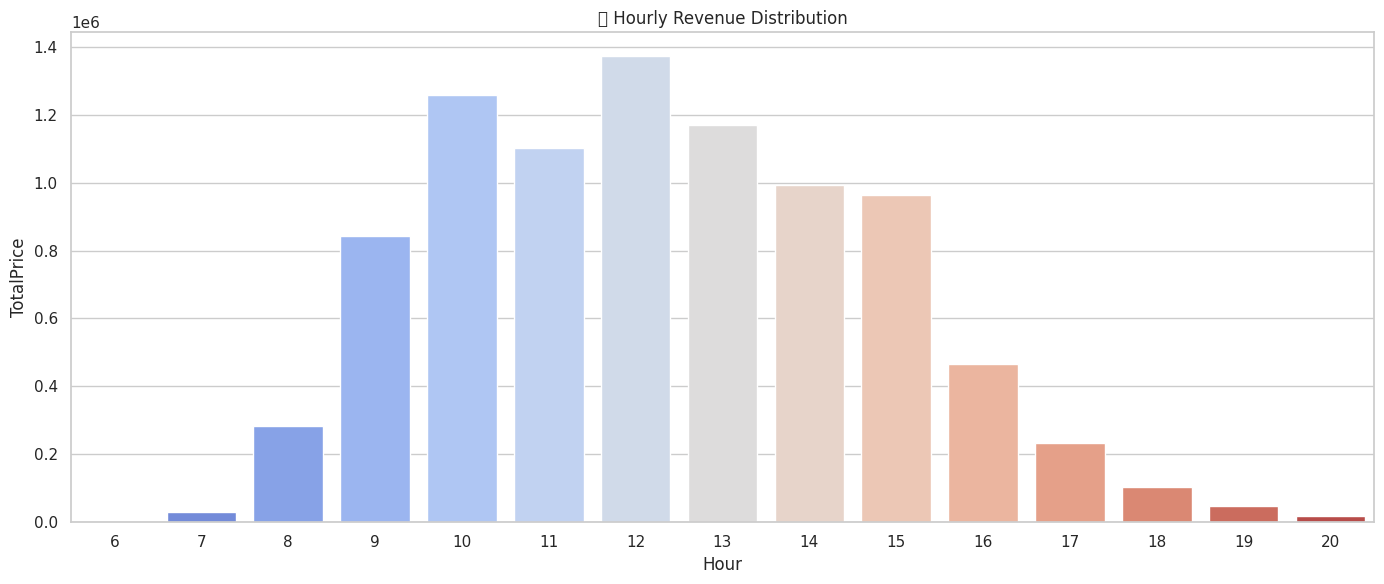

In [ ]:
hourly = df.groupby('Hour')['TotalPrice'].sum().reset_index()
sns.barplot(data=hourly, x='Hour', y='TotalPrice', palette="coolwarm")
plt.title("⏰ Hourly Revenue Distribution")
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDay,InvoiceMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022-12-01,2022-12,8
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01,2022-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022-12-01,2022-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01,2022-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01,2022-12,8


# Top 10 Customers by Revenue

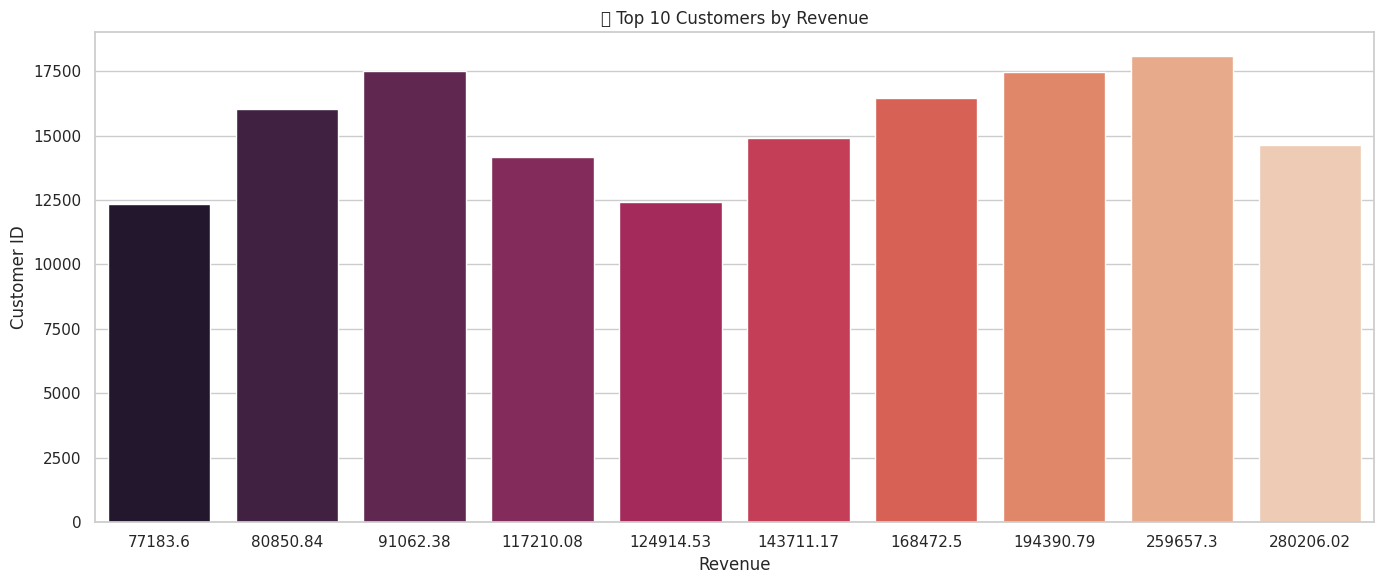

In [ ]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()
sns.barplot(data=top_customers, x='TotalPrice', y='CustomerID', palette='rocket')
plt.title("👤 Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

 # TreeMap of Product Sales

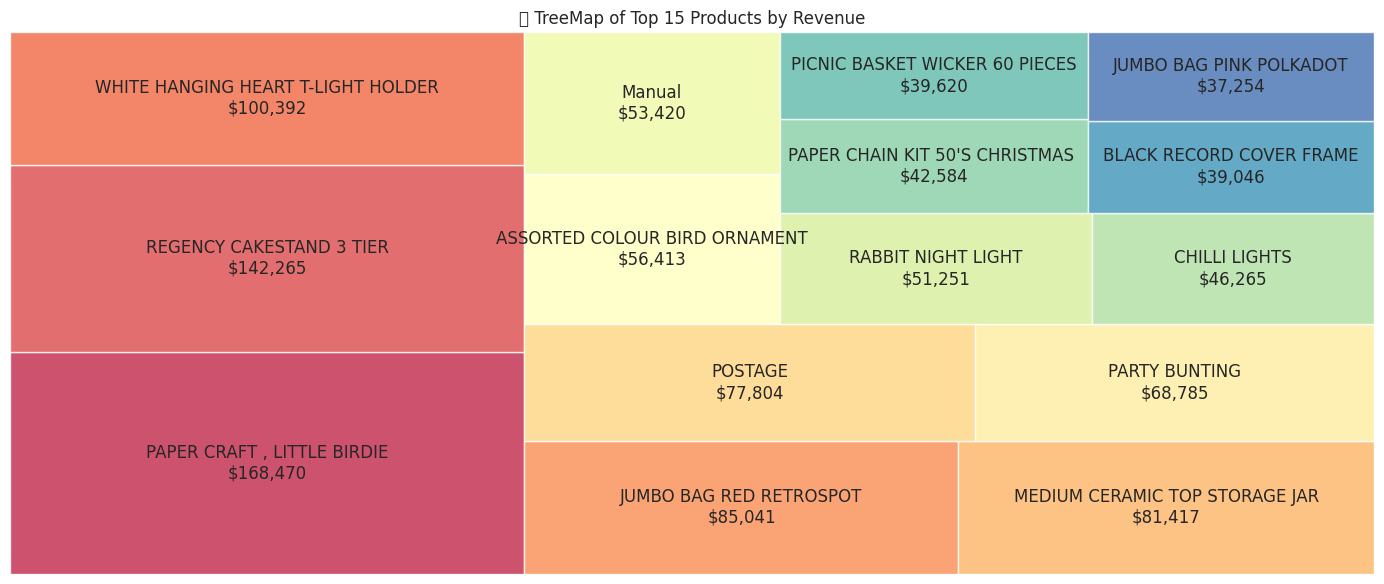

In [ ]:
product_sales = df.groupby('Description')['TotalPrice'].sum().nlargest(15)
labels = [f"{i}\n${j:,.0f}" for i, j in zip(product_sales.index, product_sales.values)]
squarify.plot(sizes=product_sales.values, label=labels, alpha=.8, color=sns.color_palette("Spectral", 15))
plt.title("🌲 TreeMap of Top 15 Products by Revenue")
plt.axis('off')
plt.tight_layout()
plt.show()

# Boxplot – Unit Price by Country

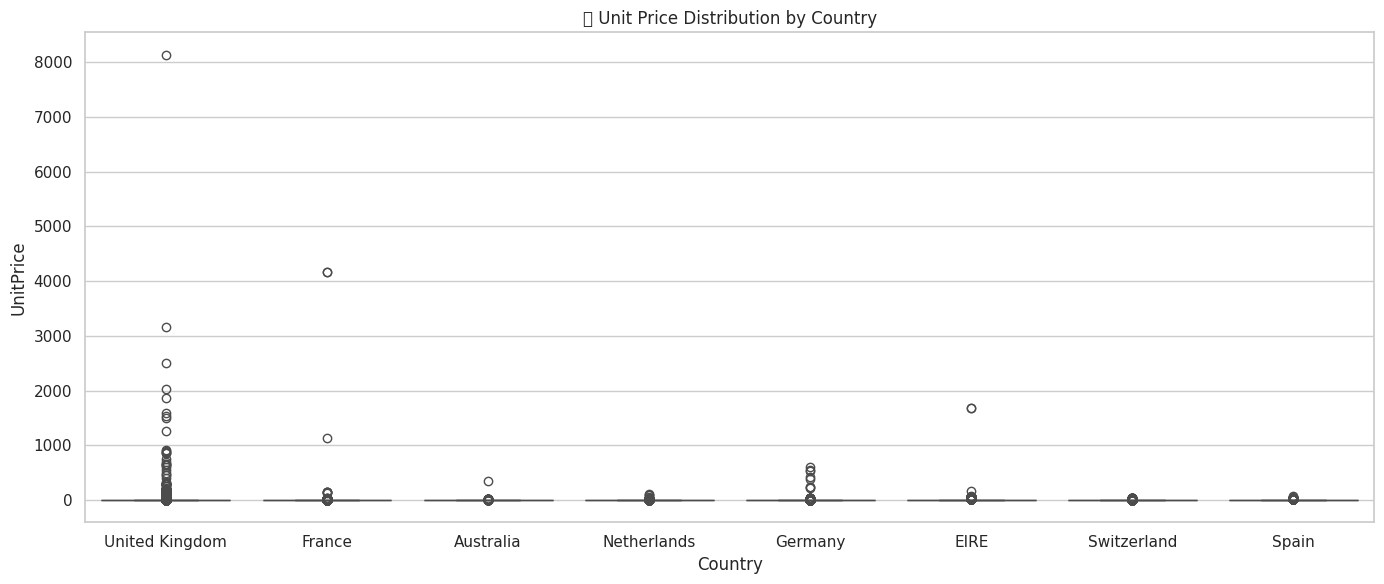

In [ ]:
top_countries_box = df[df['Country'].isin(top_countries.index)]
sns.boxplot(data=top_countries_box, x='Country', y='UnitPrice')
plt.title("📦 Unit Price Distribution by Country")
plt.tight_layout()
plt.show()

# Average Spend per Invoice by Country (Bar Chart)

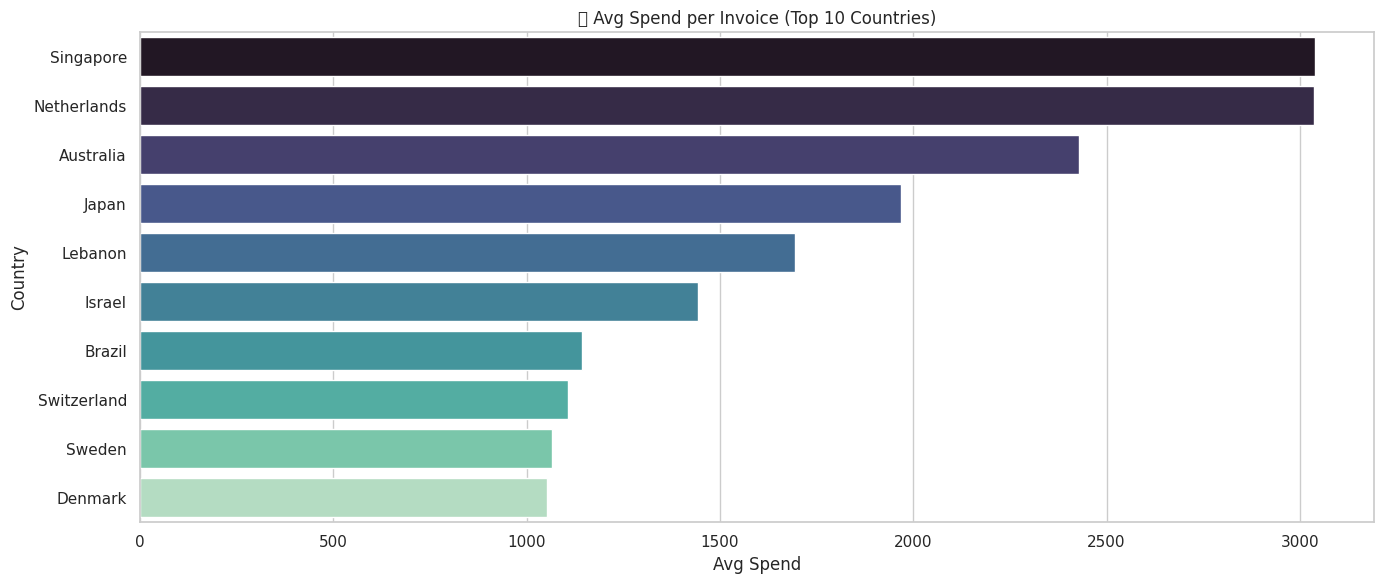

In [ ]:
avg_invoice = df.groupby(['Country', 'InvoiceNo'])['TotalPrice'].sum().reset_index()
avg_by_country = avg_invoice.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_by_country.values, y=avg_by_country.index, palette="mako")
plt.title("💳 Avg Spend per Invoice (Top 10 Countries)")
plt.xlabel("Avg Spend")
plt.tight_layout()
plt.show()

## RFM Feature Engineering Code

In [ ]:
 #Set reference date as the latest invoice date
ref_date = df['InvoiceDate'].max()

# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

Normalize RFM Values & Apply Clustering

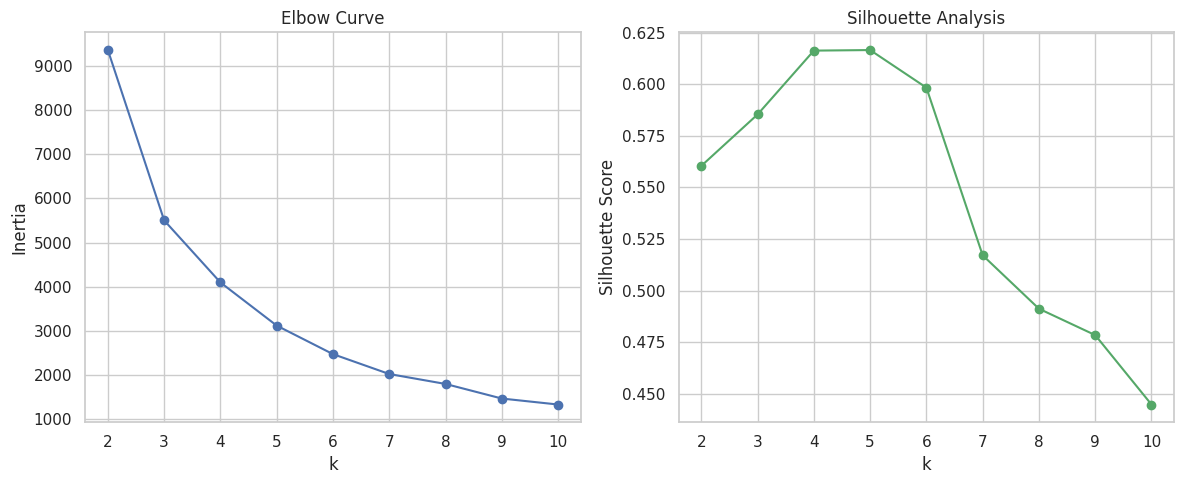

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow method
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, model.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()


In [ ]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Interpret Clusters
rfm.groupby('Cluster').mean().style.background_gradient(cmap='Blues')

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15289.128356,42.702685,3.682711,1353.625312
1,15347.791940,247.075914,1.552015,478.848773
2,15435.000000,6.384615,82.538462,127187.959231
3,15212.857843,14.500000,22.333333,12690.500392


# RFM Cluster Visualization

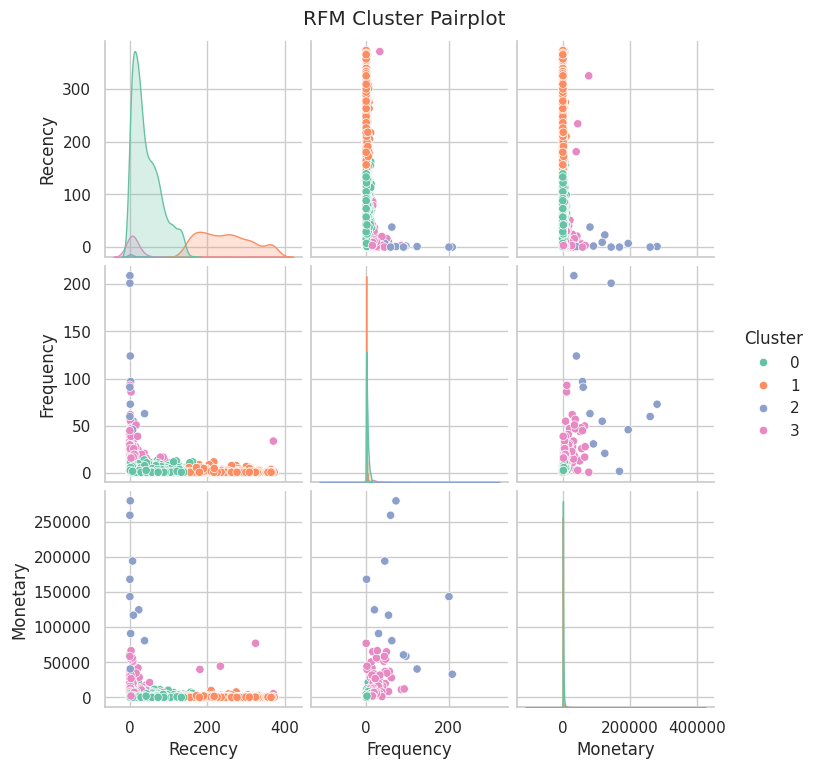

In [ ]:
# Visualize clusters
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='Set2')
plt.suptitle("RFM Cluster Pairplot", y=1.02)
plt.show()

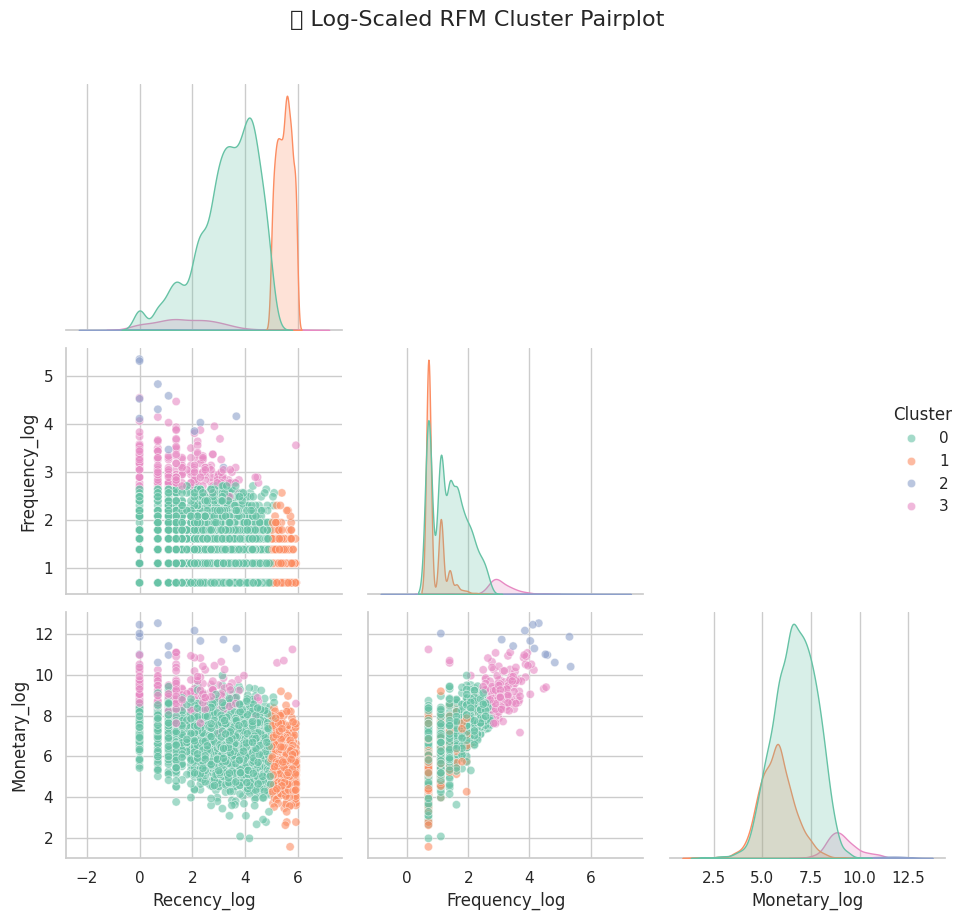

In [ ]:
# Log-transform to reduce skew (add 1 to avoid log(0))
rfm_log = rfm.copy()
rfm_log['Recency_log'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency_log'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary_log'] = np.log1p(rfm_log['Monetary'])

# Select transformed columns and Cluster for plotting
plot_data = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log', 'Cluster']]

# Pairplot with better readability
sns.pairplot(
    plot_data,
    hue='Cluster',
    palette='Set2',
    diag_kind='kde',
    plot_kws={'alpha': 0.6},  # transparency
    height=3,
    corner=True  # remove duplicate upper plots
)

plt.suptitle("📊 Log-Scaled RFM Cluster Pairplot", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


This pairplot visualizes customer segments formed through KMeans clustering on log-transformed Recency, Frequency, and Monetary (RFM) values. The log scale reduces the skewness caused by extreme spenders or rare buyers, enabling clearer separation of clusters.

Each color represents a distinct customer segment:

Cluster 0: Recent and moderately frequent buyers with moderate spending.

Cluster 1: Older, infrequent customers with lower monetary value — possibly at-risk.

Cluster 2: High-frequency, high-spending customers — top-value customers.

Cluster 3: Medium recency/frequency with moderate to high monetary — regulars or seasonal buyers.

The diagonal KDE plots show the distribution of each RFM metric per cluster.



Label Cluster Segments (High-Value, At-Risk, etc.)

In [ ]:
# You can define labels based on business logic (manual mapping)
def label_cluster(row):
    if row['Cluster'] == rfm.groupby('Cluster')['Monetary'].mean().idxmax():
        return 'High-Value'
    elif row['Recency'] > rfm['Recency'].mean():
        return 'At-Risk'
    elif row['Frequency'] > rfm['Frequency'].mean():
        return 'Regular'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,1,77183.60,3,At-Risk
1,12347.0,1,7,4310.00,0,Regular
2,12348.0,74,4,1797.24,0,Occasional
3,12349.0,18,1,1757.55,0,Occasional
4,12350.0,309,1,334.40,1,At-Risk


# Product Recommendation using Collaborative Filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Create product purchase matrix (CustomerID x StockCode)
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

# Transpose to get item-item similarity
item_similarity = cosine_similarity(product_matrix.T)
item_sim_df = pd.DataFrame(item_similarity, index=product_matrix.columns, columns=product_matrix.columns)

Recommend Top 5 Similar Products

In [ ]:
def get_similar_products(product_code, top_n=5):
    if product_code in item_sim_df.columns:
        sim_scores = item_sim_df[product_code].sort_values(ascending=False)[1:top_n+1]
        return sim_scores
    else:
        return f"❌ Product code {product_code} not found in data."

# Example usage
similar_items = get_similar_products('85123A')  # Replace with any StockCode
print("Top 5 similar products to 85123A:\n", similar_items)

Top 5 similar products to 85123A:
 StockCode
21175    0.749457
21733    0.658728
82552    0.643888
82551    0.642474
23288    0.630984
Name: 85123A, dtype: float64


Product Similarity Heatmap (Optional for EDA)


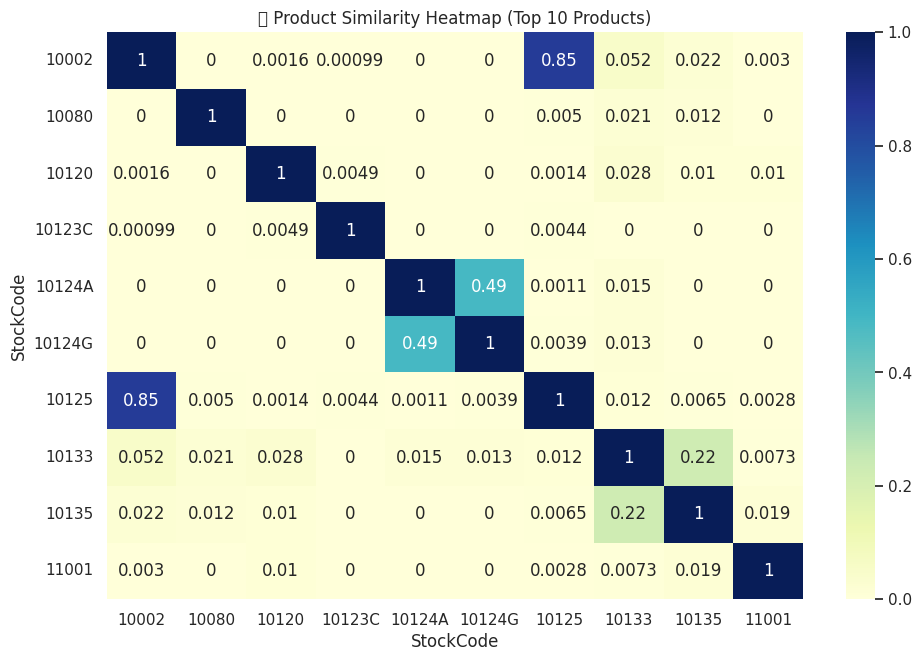

In [ ]:
top_codes = item_sim_df.columns[:10]  # First 10 products (or your top selling ones)
heatmap_data = item_sim_df.loc[top_codes, top_codes]

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("🔍 Product Similarity Heatmap (Top 10 Products)")
plt.show()

In [ ]:
import pickle

with open('rfm_kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

item_sim_df.to_pickle('item_similarity.pkl')


Personalized Product Recommendations

In [ ]:
def recommend_for_customer(customer_id, top_n=5):
    if customer_id not in product_matrix.index:
        return f"Customer {customer_id} not found."

    customer_vector = product_matrix.loc[customer_id]
    purchased_items = customer_vector[customer_vector > 0].index.tolist()

    similar_items = pd.Series(dtype='float64')

    for item in purchased_items:
        sims = item_sim_df[item].drop(purchased_items, errors='ignore')  # Exclude already purchased
        similar_items = similar_items.add(sims, fill_value=0)

    top_recommendations = similar_items.sort_values(ascending=False).head(top_n)
    return top_recommendations

# Example: Recommend for a customer
print(recommend_for_customer(12346))


StockCode
23165    0.008958
22652    0.007584
22985    0.007535
21984    0.007298
21980    0.007018
dtype: float64


In [ ]:
from google.colab import files
files.download('rfm_kmeans_model.pkl')
files.download('scaler.pkl')
files.download('item_similarity.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
os.listdir()

['.config',
 'rfm_kmeans_model.pkl',
 'item_similarity.pkl',
 'scaler.pkl',
 'drive',
 'sample_data']

In [ ]:
files.download('item_similarity.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create unique mapping: StockCode -> Description
product_meta = df[['StockCode', 'Description']].drop_duplicates()
product_meta.columns = ['ProductID', 'ProductName']

# Save to CSV
product_meta.to_csv("product_metadata.csv", index=False)

# conlusion

This project successfully delivered a robust and interactive web application using Streamlit, aimed at enhancing the user experience for e-commerce businesses through intelligent insights. The app integrates two powerful data science modules:

Product Recommendation System
Leveraging collaborative filtering based on item-item similarity, this module allows users to input a product name and receive the top 5 similar product suggestions. The model was trained using product metadata, and similarity mapping was efficiently managed through a precomputed similarity matrix. The app dynamically maps product IDs to names for an intuitive experience, resolving a common issue with ID-based recommendations.

Customer Segmentation Module
This component applies RFM (Recency, Frequency, Monetary) analysis combined with KMeans clustering to segment customers into four categories:

🟢 High-Value

🔵 Regular

🟡 Occasional

🔴 At-Risk

The segmentation helps in identifying valuable customer groups for targeted marketing, retention strategies, and business decision-making. The app uses pre-trained models and a scaler to process user inputs in real time.

Key Achievements:

Integrated product recommendation and customer segmentation into one seamless interface.

Enabled real-time predictions and insights using lightweight pickled models and metadata.

Deployed a clean, user-friendly interface with effective error handling and output styling.

Future Scope:

Integrate user login and session history to personalize recommendations.

Enhance the recommendation engine using hybrid methods (e.g., combining collaborative and content-based filtering).

Automate data pipeline to regularly refresh RFM metrics and product metadata.